# Análisis del Dataset 
Análisis de cada uno de los 7 archivos formato csv contenidos en el Dataset: "Open University Learning Analytics dataset"

In [101]:
# Se importan las librerías a utilizar en todo el proyecto

import numpy as np
import pandas as pd
import os
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
from scipy import stats

## 1. Archivo "studentVle.csv"

In [82]:
# Cargar los archivos del Dataset que están en formato csv a objetos tipo Pandas
# Tabla con la relación de eventos

studentsVle = pd.read_csv('Datos/studentVle.csv', sep=',')
display(studentsVle)
display(studentsVle.describe(include='all'))
studentsVle.info()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


,code_module,code_presentation,id_student,id_site,date,sum_click
count,10655280,10655280,1.065528e+07,1.065528e+07,1.065528e+07,1.065528e+07
unique,7,4,NaN,NaN,NaN,NaN
top,FFF,2014J,NaN,NaN,NaN,NaN
freq,4014499,3619452,NaN,NaN,NaN,NaN
mean,NaN,NaN,7.333336e+05,7.383234e+05,9.517400e+01,3.716946e+00
std,NaN,NaN,5.827060e+05,1.312196e+05,7.607130e+01,8.849047e+00
min,NaN,NaN,6.516000e+03,5.267210e+05,-2.500000e+01,1.000000e+00
25%,NaN,NaN,5.077430e+05,6.735190e+05,2.500000e+01,1.000000e+00
50%,NaN,NaN,5.882360e+05,7.300690e+05,8.600000e+01,2.000000e+00
75%,NaN,NaN,6.464840e+05,8.770300e+05,1.560000e+02,3.000000e+00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [83]:
# Comprobar si existen valores ausentes
mask = studentsVle.isna()

# Contabilizar los True en la máscara
count_true = mask.sum()

print("Conteo de valores ausentes en el DataFrame studentsVle:")
print(count_true)

Conteo de valores ausentes en el DataFrame studentsVle:
code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64


In [84]:
# Se transforman los datos categóricos a números

studentsVle.loc[studentsVle['code_module'] == 'AAA','code_module'] = '1'
studentsVle.loc[studentsVle['code_module'] == 'BBB','code_module'] = '2'
studentsVle.loc[studentsVle['code_module'] == 'CCC','code_module'] = '3'
studentsVle.loc[studentsVle['code_module'] == 'DDD','code_module'] = '4'
studentsVle.loc[studentsVle['code_module'] == 'EEE','code_module'] = '5'
studentsVle.loc[studentsVle['code_module'] == 'FFF','code_module'] = '6'
studentsVle.loc[studentsVle['code_module'] == 'GGG','code_module'] = '7'

studentsVle.loc[studentsVle['code_presentation'] == '2013B','code_presentation'] = '1'
studentsVle.loc[studentsVle['code_presentation'] == '2013J','code_presentation'] = '2'
studentsVle.loc[studentsVle['code_presentation'] == '2014B','code_presentation'] = '3'
studentsVle.loc[studentsVle['code_presentation'] == '2014J','code_presentation'] = '4'

# Se transforman los datos tipo string a int 

studentsVle['code_module'] = studentsVle['code_module'].astype('int64')
studentsVle['code_presentation'] = studentsVle['code_presentation'].astype('int64')

In [85]:
# Función para detectar Outliers utilizando 4 algoritmos
# Definimos una función que, dado un determinado "df" y un "algorithm", devuelva la matriz y la posición de outliers

def find_outliers(df, algorithm):
    # Entrenamos el algoritmo
    outlier_method = algorithm.fit(df)
    
    # Aplicamos el método de detección de outliers entrenado sobre nuesto dataset
    df_outliers = outlier_method.predict(df)

    # Determinar la posición de los outliers
    pos_outliers = np.where(df_outliers==-1)[0]
    
    return df_outliers, pos_outliers

In [138]:
# Permite ejecutar cada uno de los 4 algoritmos cambiando la sigla en la última línea del código

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

IF = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
OC_SVM =  OneClassSVM(kernel='poly', degree=1, gamma='auto')
LOF = LocalOutlierFactor(n_neighbors=20, algorithm='auto', metric='euclidean', contamination='auto', novelty=True)
EE = EllipticEnvelope(support_fraction=None, contamination=0.25, random_state=42)

df_outliers, pos_outliers = find_outliers(studentsVle, LOF)

/Users/dvelasquez/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [87]:
# Determinar la posición de los outliers
pos_outliers = np.where(df_outliers==-1)[0]
print('\nOutliers en la posición: \n', pos_outliers)

# Determinar el número de outliers
print('\nNúmero de outliers: \n', len(pos_outliers))


Outliers en la posición: 
 [       7        8       10 ... 10655277 10655278 10655279]

Número de outliers: 
 606862


In [88]:
# Función para detectar Outliers visualizando el diagrama de caja de cada atributo del DataFrame

def vis_box(a, nom):
    # Seleccionamos los umbrales a partir de los cuales vamos a considerar outliers
    Q1 = stats.scoreatpercentile(a, 25)
    Q3 = stats.scoreatpercentile(a, 75)
    RIC = Q3 - Q1
    li = Q1 - 1.5*RIC #xmin
    ls = Q3 + 1.5*RIC #xmax

    # Observamos los límites inferior y superior
    print('Nombre del campo:', nom)
    print('limite inferior: ', li)
    print('limite superior: ', ls)

    # Buscamos la posición de los outliers
    pos_i = np.where(a<li)[0]
    pos_s = np.where(a>ls)[0]
    pos_outliers = np.concatenate((pos_i, pos_s))
    print('Posición de outliers: ', pos_outliers)
    print('Número de outliers: ', len(pos_outliers))

    # Dibujamos el diagrama de caja y bigotes
    prop = plt.boxplot(a)
    plt.boxplot(a)
    plt.grid()
    plt.show()
    
    return pos_outliers

limite inferior:  -1.5
limite superior:  10.5
Posición de outliers:  []
Número de outliers:  0


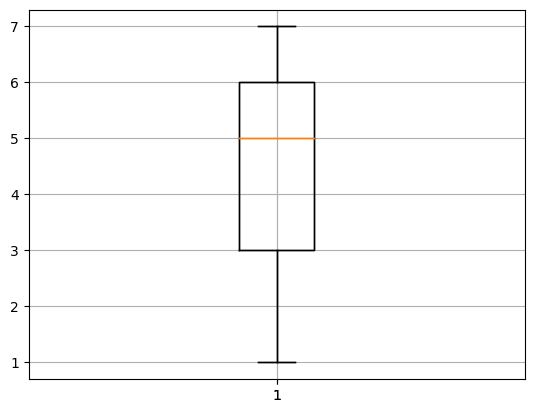

limite inferior:  -1.0
limite superior:  7.0
Posición de outliers:  []
Número de outliers:  0


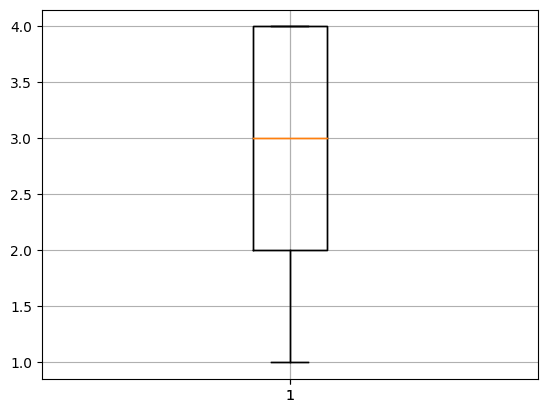

limite inferior:  299631.5
limite superior:  854595.5
Posición de outliers:  [       0        1        2 ... 10655187 10655239 10655264]
Número de outliers:  2371252


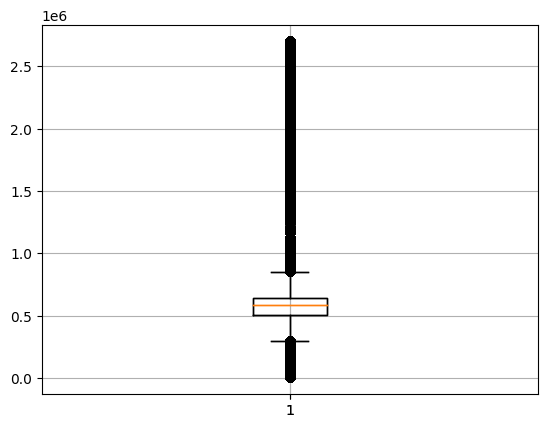

limite inferior:  368252.5
limite superior:  1182296.5
Posición de outliers:  []
Número de outliers:  0


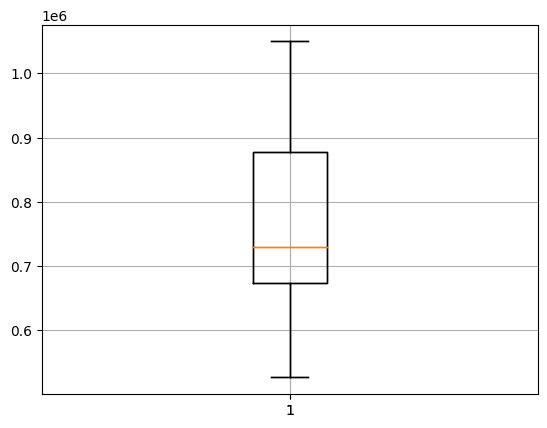

limite inferior:  -171.5
limite superior:  352.5
Posición de outliers:  []
Número de outliers:  0


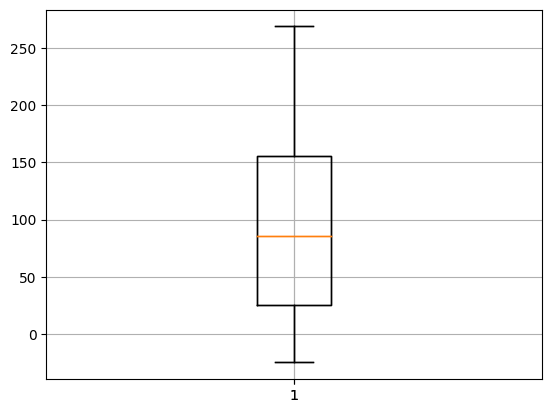

limite inferior:  -2.0
limite superior:  6.0
Posición de outliers:  [       3        5        7 ... 10655067 10655153 10655266]
Número de outliers:  1314646


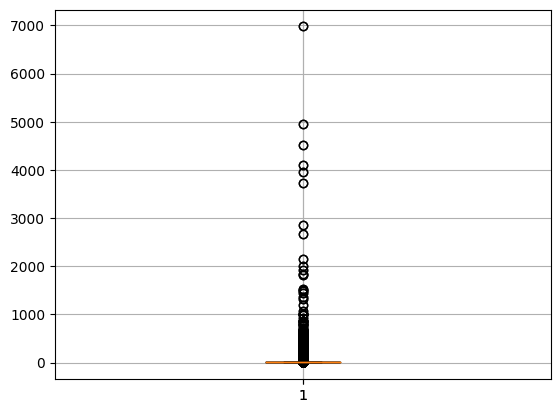

In [14]:
# Bucle for que estime los valores outliers de cada atributo

headers = studentsVle.columns # nombre de los atributos del CSV
pos_outliers = []
for i in range(len(headers)):
    variable = studentsVle[headers[i]] # Atributo i
    pos_out = find_limits_BP(variable, headers[i]) # Buscamos los outliers en esa variable con la función que hemos creado
    pos_out = np.expand_dims(pos_out, axis=1) # Llamamos a la función que hemos creado
    pos_outliers.append(pos_out) # Lo añadimos en una lista

Nombre del campo: sum_click
limite inferior:  -2.0
limite superior:  6.0
Posición de outliers:  [       3        5        7 ... 10655067 10655153 10655266]
Número de outliers:  1314646


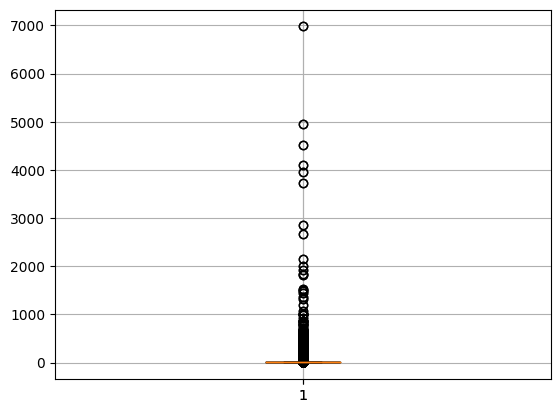

Posiciones de outliers:  [       3        5        7 ... 10655067 10655153 10655266]
Numero de outliers:  1314646
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype
---  ------             -----
 0   code_module        int64
 1   code_presentation  int64
 2   id_student         int64
 3   id_site            int64
 4   date               int64
 5   sum_click          int64
dtypes: int64(6)
memory usage: 487.8 MB
<class 'pandas.core.frame.DataFrame'>
Index: 9340634 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype
---  ------             -----
 0   code_module        int64
 1   code_presentation  int64
 2   id_student         int64
 3   id_site            int64
 4   date               int64
 5   sum_click          int64
dtypes: int64(6)
memory usage: 498.8 MB


In [90]:
# Se eliminan los registros que están como outliers en el atributo sum_click
pos_eli = vis_box(studentsVle['sum_click'], "sum_click")
print('Posiciones de outliers: ', pos_eli)
print('Numero de outliers: ', len(pos_eli))
studentsVle.info()
# Se eliminan los registros
studentsVle_wout = studentsVle.drop(index=pos_eli)

# Total de registros después de eliminar
studentsVle_wout.info()

In [103]:
ruta = os.path.join("res" ,"df_studentsVle.csv")

studentsVle_wout.to_csv(ruta, sep=';')

In [117]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = studentsVle_wout.drop(['id_student'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
positive_corr.idxmax()
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,code_module,code_presentation,id_site,date,sum_click
code_module,0.000000,-0.067908,-0.034036,-0.000485,0.004779
code_presentation,-0.067908,0.000000,0.947748,0.049422,-0.006689
id_site,-0.034036,0.947748,0.000000,0.062820,-0.017694
date,-0.000485,0.049422,0.062820,0.000000,-0.010408
sum_click,0.004779,-0.006689,-0.017694,-0.010408,0.000000


## 2. Archivo "studentInfo.csv"

In [91]:
# Tabla con información del estudiante

students = pd.read_csv('Datos/studentInfo.csv', sep=',')

display(students)
display(students.describe(include='all'))
students.info()


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
count,32593,32593,3.259300e+04,32593,32593,32593,31482,32593,32593.000000,32593.000000,32593,32593
unique,7,4,NaN,2,13,5,10,3,NaN,NaN,2,4
top,BBB,2014J,NaN,M,Scotland,A Level or Equivalent,20-30%,0-35,NaN,NaN,N,Pass
freq,7909,11260,NaN,17875,3446,14045,3654,22944,NaN,NaN,29429,12361
mean,NaN,NaN,7.066877e+05,NaN,NaN,NaN,NaN,NaN,0.163225,79.758691,NaN,NaN
std,NaN,NaN,5.491673e+05,NaN,NaN,NaN,NaN,NaN,0.479758,41.071900,NaN,NaN
min,NaN,NaN,3.733000e+03,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000,NaN,NaN
25%,NaN,NaN,5.085730e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,5.903100e+05,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN
75%,NaN,NaN,6.444530e+05,NaN,NaN,NaN,NaN,NaN,0.000000,120.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [92]:
# Comprobar si existen valores ausentes
mask = students.isna()

# Contabilizar los True en la máscara
count_true = mask.sum()

print("Conteo de valores ausentes en el DataFrame students:")
print(count_true)

Conteo de valores ausentes en el DataFrame students:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
dtype: int64


In [93]:
#eliminar columna "imd_band" que no aporta información que pueda ser replicable
del students['imd_band']
display(students)
students.info()

,code_module,code_presentation,id_student,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,35-55,0,30,N,Withdrawn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   age_band              32593 non-null  object
 7   num_of_prev_attempts  32593 non-null  int64 
 8   studied_credits       32593 non-null  int64 
 9   disability            32593 non-null  object
 10  final_result          32593 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [94]:
students.loc[students['age_band'] == '0-35','age_band'] = '1'
students.loc[students['age_band'] == '35-55','age_band'] = '2'
students.loc[students['age_band'] == '55<=','age_band'] = '3'

students.loc[students['gender'] == 'F','gender'] = '1'
students.loc[students['gender'] == 'M','gender'] = '2'

students.loc[students['disability'] == 'N','disability'] = '1'
students.loc[students['disability'] == 'Y','disability'] = '2'

students.loc[students['highest_education'] == 'No Formal quals','highest_education'] = '1'
students.loc[students['highest_education'] == 'Lower Than A Level','highest_education'] = '2'
students.loc[students['highest_education'] == 'A Level or Equivalent','highest_education'] = '3'
students.loc[students['highest_education'] == 'HE Qualification','highest_education'] = '4'
students.loc[students['highest_education'] == 'Post Graduate Qualification','highest_education'] = '5'


students.loc[students['final_result'] == 'Withdrawn','final_result'] = '0'
students.loc[students['final_result'] == 'Fail','final_result'] = '0'
students.loc[students['final_result'] == 'Pass','final_result'] = '1'
students.loc[students['final_result'] == 'Distinction','final_result'] = '1'

students.loc[students['code_module'] == 'AAA','code_module'] = '1'
students.loc[students['code_module'] == 'BBB','code_module'] = '2'
students.loc[students['code_module'] == 'CCC','code_module'] = '3'
students.loc[students['code_module'] == 'DDD','code_module'] = '4'
students.loc[students['code_module'] == 'EEE','code_module'] = '5'
students.loc[students['code_module'] == 'FFF','code_module'] = '6'
students.loc[students['code_module'] == 'GGG','code_module'] = '7'

students.loc[students['code_presentation'] == '2013B','code_presentation'] = '1'
students.loc[students['code_presentation'] == '2013J','code_presentation'] = '2'
students.loc[students['code_presentation'] == '2014B','code_presentation'] = '3'
students.loc[students['code_presentation'] == '2014J','code_presentation'] = '4'

students.loc[students['region'] == 'East Anglian Region','region'] = '1'
students.loc[students['region'] == 'Scotland','region'] = '2'
students.loc[students['region'] == 'North Western Region','region'] = '3'
students.loc[students['region'] == 'South East Region','region'] = '4'
students.loc[students['region'] == 'West Midlands Region','region'] = '5'
students.loc[students['region'] == 'Wales','region'] = '6'
students.loc[students['region'] == 'North Region','region'] = '7'
students.loc[students['region'] == 'South Region','region'] = '8'
students.loc[students['region'] == 'Ireland','region'] = '9'
students.loc[students['region'] == 'South West Region','region'] = '10'
students.loc[students['region'] == 'East Midlands Region','region'] = '11'
students.loc[students['region'] == 'Yorkshire Region','region'] = '12'
students.loc[students['region'] == 'London Region','region'] = '13'

students['code_module'] = students['code_module'].astype('int64')
students['code_presentation'] = students['code_presentation'].astype('int64')
students['gender'] = students['gender'].astype('int64')
students['region'] = students['region'].astype('int64')
students['highest_education'] = students['highest_education'].astype('int64')
students['age_band'] = students['age_band'].astype('int64')
students['disability'] = students['disability'].astype('int64')
students['final_result'] = students['final_result'].astype('int64')


Nombre del campo: highest_education
limite inferior:  0.5
limite superior:  4.5
Posición de outliers:  [    9    28    34    95   130   143   222   224   941  2288  2620  3407
  3872  4333  4540  4782  4855  4902  7103  8002  8038  8193  8515  8690
  8720  8751  8764  8786  8836  8861  8954  9027  9045  9058  9073  9085
  9186  9198  9205  9356  9410  9413  9431  9600  9610  9709  9787  9795
  9870  9915  9987 10010 10018 10026 10042 10070 10087 10235 10240 10244
 10247 10283 10286 10339 10354 10366 10381 10439 10519 10548 10554 10574
 10575 10582 10603 10632 10634 10659 10765 10800 10826 10885 10930 10936
 10965 10988 11005 11154 11319 11394 11481 11493 11544 11759 11769 11820
 11828 11935 11977 12037 12063 12071 12072 12084 12103 12109 12131 12192
 12213 12247 12257 12277 12300 12374 12387 12391 12416 12475 12507 12527
 12554 12586 12588 12607 12639 12650 12666 12690 12725 12731 12777 12790
 12807 12808 12946 12991 13017 13088 13143 13229 13367 13448 13552 13553
 13716 13726 13980 13

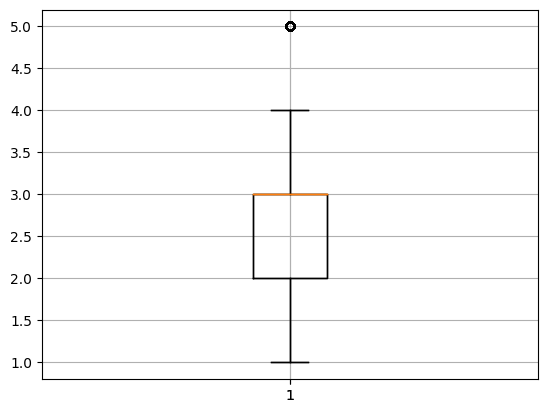

Nombre del campo: num_of_prev_attempts
limite inferior:  0.0
limite superior:  0.0
Posición de outliers:  [  395   403   412 ... 32017 32567 32580]
Número de outliers:  4172


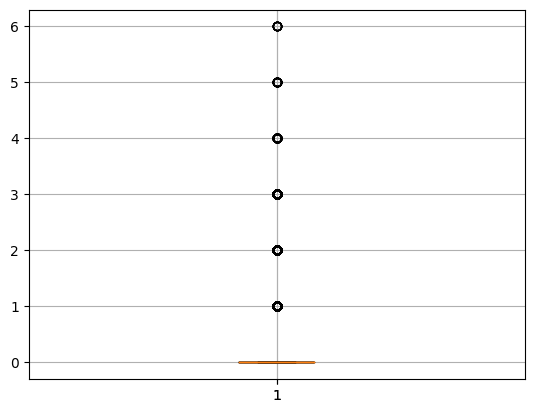

Nombre del campo: studied_credits
limite inferior:  -30.0
limite superior:  210.0
Posición de outliers:  [    0    47    48    57    93    94   129   156   193   198   261   273
   307   330   445   471   554   578   630   690   696   766   835   839
   865   889   919   955   959   997  1003  1019  1060  1121  1128  1135
  1154  1259  1262  1305  1339  1341  1347  1361  1364  1397  1424  1433
  1511  1528  1530  1586  2419  2476  2480  2526  2629  2668  2733  2778
  2869  2953  3051  3157  3210  3277  3422  4260  4660  4695  4725  4792
  4794  4824  4841  4985  5048  5073  5139  5175  5312  5351  5370  5385
  5405  6281  6314  6359  6363  6432  6468  6582  6681  6722  6730  6988
  7048  7189  7602  7614  7766  7884  7938  7964  7969  7993  8636  8690
  8734  8803  8819  8983  9518  9631  9690  9728  9731  9740  9850 10378
 10477 10488 10612 10660 10715 10802 10976 11231 11240 11315 11405 12025
 12134 12138 12199 12281 12283 12444 12450 12494 12573 12660 12715 12756
 12816 12842 12850 

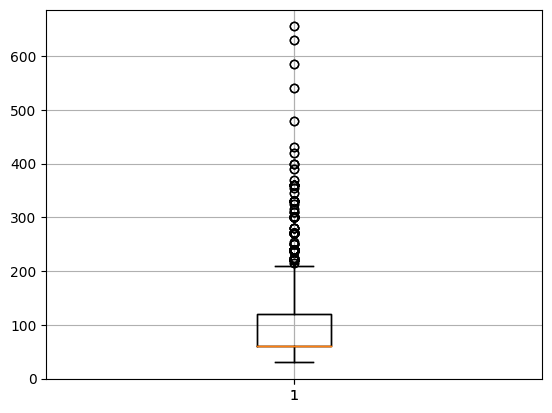

In [96]:
# Bucle for que estima los valores outliers de cada atributo

headers = ['highest_education','num_of_prev_attempts','studied_credits'] # nombre de los atributos del CSV
pos_outliers = []
for i in range(len(headers)):
    variable = students[headers[i]] # Atributo i
    pos_out = vis_box(variable, headers[i]) # Buscamos los outliers en esa variable con la función que hemos creado
    pos_out = np.expand_dims(pos_out, axis=1) # Llamamos a la función que hemos creado
    pos_outliers.append(pos_out) # Lo añadimos en una lista

# Concatenamos todas las posiciones de outliers
conc_pos = np.vstack(pos_outliers)

In [97]:
# Se eliminan los outliers repetidos
pos_out = np.unique(conc_pos)
print('Posiciones de outliers: ', pos_out)
print('Numero de outliers: ', len(pos_out))

Posiciones de outliers:  [    0     9    28 ... 32021 32567 32580]
Numero de outliers:  4681


In [98]:
# Se eliminan todos los outliers del Dataframe
students.info()
students = students.drop(index=pos_out)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   code_module           32593 non-null  int64
 1   code_presentation     32593 non-null  int64
 2   id_student            32593 non-null  int64
 3   gender                32593 non-null  int64
 4   region                32593 non-null  int64
 5   highest_education     32593 non-null  int64
 6   age_band              32593 non-null  int64
 7   num_of_prev_attempts  32593 non-null  int64
 8   studied_credits       32593 non-null  int64
 9   disability            32593 non-null  int64
 10  final_result          32593 non-null  int64
dtypes: int64(11)
memory usage: 2.7 MB
<class 'pandas.core.frame.DataFrame'>
Index: 27912 entries, 1 to 32592
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   code_mod

In [104]:
ruta = os.path.join("res" ,"df_students.csv")

students.to_csv(ruta, sep=';')

In [139]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = students.drop(['id_student', 'num_of_prev_attempts'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,code_module,code_presentation,gender,region,highest_education,age_band,studied_credits,disability,final_result
code_module,0.000000,-0.031762,0.269579,0.023215,-0.084988,-0.043737,-0.163660,0.030649,0.039689
code_presentation,-0.031762,0.000000,0.056408,-0.009966,0.030443,0.001726,0.004457,-0.002196,-0.002051
gender,0.269579,0.056408,0.000000,-0.019027,0.062568,-0.029564,0.036420,-0.038980,-0.026796
region,0.023215,-0.009966,-0.019027,0.000000,-0.060871,-0.002710,0.019235,-0.032749,-0.011117
highest_education,-0.084988,0.030443,0.062568,-0.060871,0.000000,0.087146,0.037865,-0.072470,0.139975
age_band,-0.043737,0.001726,-0.029564,-0.002710,0.087146,0.000000,-0.085484,-0.025337,0.074020
studied_credits,-0.163660,0.004457,0.036420,0.019235,0.037865,-0.085484,0.000000,0.035846,-0.123445
disability,0.030649,-0.002196,-0.038980,-0.032749,-0.072470,-0.025337,0.035846,0.000000,-0.052391
final_result,0.039689,-0.002051,-0.026796,-0.011117,0.139975,0.074020,-0.123445,-0.052391,0.000000


## 3. Archivo "courses.csv"

In [128]:
# Tabla con información de los cursos
# Esta tabla se utiliza para obtener la cantidad de módulos disponibles y los semestres 
# No se realizan análisis de outliers o ausentes porque no se identican 

courses = pd.read_csv('Datos/courses.csv', sep=',')

display(courses)
display(courses.describe(include='all'))
courses.info()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


,code_module,code_presentation,module_presentation_length
count,22,22,22.000000
unique,7,4,NaN
top,BBB,2014J,NaN
freq,4,7,NaN
mean,NaN,NaN,255.545455
std,NaN,NaN,13.654677
min,NaN,NaN,234.000000
25%,NaN,NaN,241.000000
50%,NaN,NaN,261.500000
75%,NaN,NaN,268.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


## 4. Archivo "studentRegistration.csv"

In [130]:
# Tabla con información de los registros de los estudiantes
# Esta tabla no se utiliza porque solo contiene la fecha de inscripción a cada módulo
# No se realizan análisis de outliers o ausentes 

registration = pd.read_csv('Datos/studentRegistration.csv', sep=',')

display(registration)
display(registration.describe(include='all'))
registration.info()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,NaN
32589,GGG,2014J,2645731,-23.0,NaN
32590,GGG,2014J,2648187,-129.0,NaN
32591,GGG,2014J,2679821,-49.0,101.0


,code_module,code_presentation,id_student,date_registration,date_unregistration
count,32593,32593,3.259300e+04,32548.000000,10072.000000
unique,7,4,NaN,NaN,NaN
top,BBB,2014J,NaN,NaN,NaN
freq,7909,11260,NaN,NaN,NaN
mean,NaN,NaN,7.066877e+05,-69.411300,49.757645
std,NaN,NaN,5.491673e+05,49.260522,82.460890
min,NaN,NaN,3.733000e+03,-322.000000,-365.000000
25%,NaN,NaN,5.085730e+05,-100.000000,-2.000000
50%,NaN,NaN,5.903100e+05,-57.000000,27.000000
75%,NaN,NaN,6.444530e+05,-29.000000,109.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [131]:
# Comprobar si existen valores ausentes
mask = registration.isna()

# Contabilizar los True en la máscara
count_true = mask.sum()

print("Conteo de valores ausentes en el DataFrame registration:")
print(count_true)

Conteo de valores ausentes en el DataFrame registration:
code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64


In [127]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = registration.drop(['id_student'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,date_registration,date_unregistration
date_registration,0.000000,0.253589
date_unregistration,0.253589,0.000000


## 5. Archivo "studentAssessment.csv"

In [132]:
# Tabla con información de los registros de los recursos utilizados por los estudiantes
# Esta tabla no se utiliza porque contiene la fecha de presentación de una actividad y su score, pero la 
# nota final del módulo se encuentra en la tabla studentInfo.csv
# No se realizan análisis de outliers o ausentes 

s_assessment = pd.read_csv('Datos/studentAssessment.csv', sep=',')

display(s_assessment)
display(s_assessment.describe(include='all'))
s_assessment.info()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


,id_assessment,id_student,date_submitted,is_banked,score
count,173912.000000,1.739120e+05,173912.000000,173912.000000,173739.000000
mean,26553.803556,7.051507e+05,116.032942,0.010977,75.799573
std,8829.784254,5.523952e+05,71.484148,0.104194,18.798107
min,1752.000000,6.516000e+03,-11.000000,0.000000,0.000000
25%,15022.000000,5.044290e+05,51.000000,0.000000,65.000000
50%,25359.000000,5.852080e+05,116.000000,0.000000,80.000000
75%,34883.000000,6.344980e+05,173.000000,0.000000,90.000000
max,37443.000000,2.698588e+06,608.000000,1.000000,100.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [133]:
# Comprobar si existen valores ausentes
mask = s_assessment.isna()

# Contabilizar los True en la máscara
count_true = mask.sum()

print("Conteo de valores ausentes en el DataFrame registration:")
print(count_true)

Conteo de valores ausentes en el DataFrame registration:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64


In [125]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = s_assessment.drop(['id_assessment','id_student'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,date_submitted,is_banked,score
date_submitted,0.000000,-0.172478,-0.033893
is_banked,-0.172478,0.000000,-0.008149
score,-0.033893,-0.008149,0.000000


## 6. Archivo "assessments.csv"

In [134]:
# Tabla con información de los registros de los recursos

assessment = pd.read_csv('Datos/assessments.csv', sep=',')

display(assessment)
display(assessment.describe(include='all'))
assessment.info()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


,code_module,code_presentation,id_assessment,assessment_type,date,weight
count,206,206,206.000000,206,195.000000,206.000000
unique,7,4,NaN,3,NaN,NaN
top,FFF,2014J,NaN,TMA,NaN,NaN
freq,52,57,NaN,106,NaN,NaN
mean,NaN,NaN,26473.975728,NaN,145.005128,20.873786
std,NaN,NaN,10098.625521,NaN,76.001119,30.384224
min,NaN,NaN,1752.000000,NaN,12.000000,0.000000
25%,NaN,NaN,15023.250000,NaN,71.000000,0.000000
50%,NaN,NaN,25364.500000,NaN,152.000000,12.500000
75%,NaN,NaN,34891.750000,NaN,222.000000,24.250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [135]:
# Comprobar si existen valores ausentes
mask = assessment.isna()

# Contabilizar los True en la máscara
count_true = mask.sum()

print("Conteo de valores ausentes en el DataFrame registration:")
print(count_true)

Conteo de valores ausentes en el DataFrame registration:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64


In [122]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = assessment.drop(['id_assessment'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,date,weight
date,0.000000,0.189180
weight,0.189180,0.000000


## 7. Archivo "vle.csv"

In [136]:
# Cargar los archivos del Dataset que están en formato csv a objetos tipo Pandas
# Tabla con la relación de eventos

vle = pd.read_csv('Datos/vle.csv', sep=',')
display(vle)
display(vle.describe(include='all'))
vle.info()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


,id_site,code_module,code_presentation,activity_type,week_from,week_to
count,6.364000e+03,6364,6364,6364,1121.000000,1121.000000
unique,NaN,7,4,20,NaN,NaN
top,NaN,FFF,2013J,resource,NaN,NaN
freq,NaN,1967,1772,2660,NaN,NaN
mean,7.260991e+05,NaN,NaN,NaN,15.204282,15.214987
std,1.283151e+05,NaN,NaN,NaN,8.792865,8.779806
min,5.267210e+05,NaN,NaN,NaN,0.000000,0.000000
25%,6.615928e+05,NaN,NaN,NaN,8.000000,8.000000
50%,7.300965e+05,NaN,NaN,NaN,15.000000,15.000000
75%,8.140162e+05,NaN,NaN,NaN,22.000000,22.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [137]:
# Comprobar si existen valores ausentes
mask = vle.isna()

# Contabilizar los True en la máscara
count_true = mask.sum()

print("Conteo de valores ausentes en el DataFrame registration:")
print(count_true)

Conteo de valores ausentes en el DataFrame registration:
id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64


In [119]:
# tabla similar con las correlaciones más positivas (evitar parejas del mismo valor)
positive_corr = vle.drop(['id_site'],axis=1).corr(numeric_only=True)
np.fill_diagonal(positive_corr.values, 0)
positive_corr.style.background_gradient(cmap=plt.get_cmap('RdYlGn'), axis=1, vmin=-1.0, vmax=1.0)

,week_from,week_to
week_from,0.000000,0.999909
week_to,0.999909,0.000000
